In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("dataset/IMDB-Movie-Data.CSV")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## 评分情况分析

### 评分基本情况

In [9]:
!conda info

/bin/sh: conda: command not found


In [6]:
df['Rating'].median()

6.8

In [7]:
df['Rating'].max()

9.0

##### 哪个电影得分最高？

In [8]:
df['Rating'].argmax()

/Users/lili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


54

In [14]:
df.iloc[df['Rating'].idxmax()]

Rank                                                                 55
Title                                                   The Dark Knight
Genre                                                Action,Crime,Drama
Description           When the menace known as the Joker wreaks havo...
Director                                              Christopher Nolan
Actors                Christian Bale, Heath Ledger, Aaron Eckhart,Mi...
Year                                                               2008
Runtime (Minutes)                                                   152
Rating                                                                9
Votes                                                           1791916
Revenue (Millions)                                               533.32
Metascore                                                            82
Name: 54, dtype: object

##### 练习哪个电影得分最低？最低的是哪个电影

In [15]:
df['Rating'].min()

1.9

### 评分情况分布

In [16]:
df['Rating'].plot(kind='hist')

## 电影时长分布

### 电影时长平均值、中值、最大最小值

In [17]:
df['Runtime (Minutes)'].describe()

count    1000.000000
mean      113.172000
std        18.810908
min        66.000000
25%       100.000000
50%       111.000000
75%       123.000000
max       191.000000
Name: Runtime (Minutes), dtype: float64

In [18]:
df.iloc[df['Runtime (Minutes)'].idxmax()]

Rank                                                                829
Title                                                        Grindhouse
Genre                                            Action,Horror,Thriller
Description           Quentin Tarantino and Robert Rodriguez's homag...
Director                                               Robert Rodriguez
Actors                Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell
Year                                                               2007
Runtime (Minutes)                                                   191
Rating                                                              7.6
Votes                                                            160350
Revenue (Millions)                                                25.03
Metascore                                                           NaN
Name: 828, dtype: object

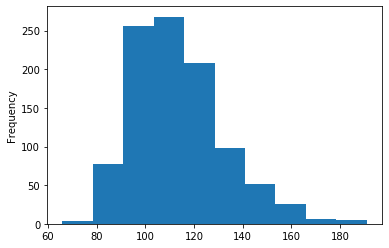

In [19]:
df['Runtime (Minutes)'].plot(kind='hist')

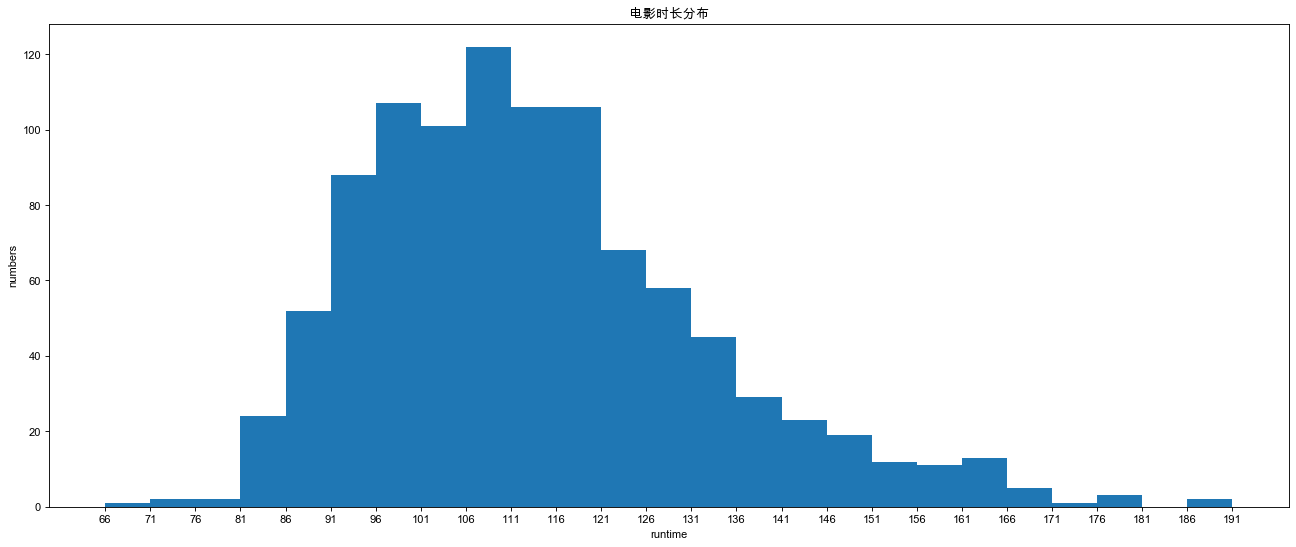

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
# 查看电影时长
runtime_data = df["Runtime (Minutes)"]
# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 最大值 最小值
max_ = runtime_data.max()
min_ = runtime_data.min()
num_bin = (max_-min_)//5
num_bin

# 绘制图像
plt.hist(runtime_data,num_bin)
# 添加刻度
plt.xticks(range(min_,max_+5,5))


plt.title("电影时长分布")

#添加x和y轴的说明

plt.xlabel("runtime")
plt.ylabel("numbers")

# 添加网格
#plt.grid()
plt.show()

###### 课上练习评分分布

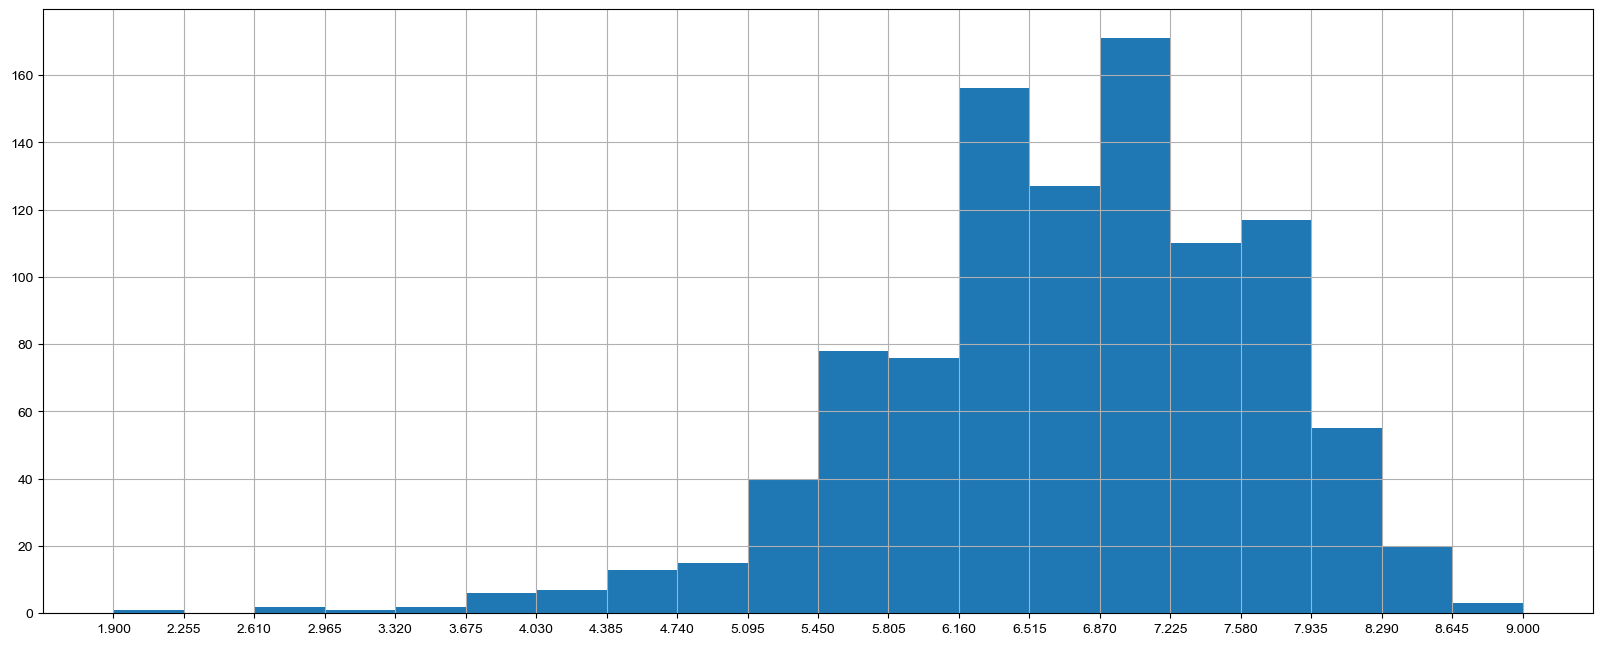

In [22]:
# 1.创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2.绘制图像
plt.hist(df["Rating"].values, bins=20)

# 2.1 添加刻度
max_ = df["Rating"].max()
min_ = df["Rating"].min()

t1 = np.linspace(min_, max_, num=21)

plt.xticks(t1)

# 2.2 添加网格
plt.grid()

# 3.显示
plt.show()

## 导演人数、演员人数

In [23]:
len(set(df['Director'].tolist()))

644

In [24]:
actors_list= df["Actors"].str.split(',').tolist() 


In [25]:
unique_actors=set()
for actors in actors_list:
    for a in actors:
        unique_actors.add(a)
unique_actors  

{' Tyler Perry',
 ' Angourie Rice',
 ' Florence Clery',
 ' Jason Cope',
 "Jack O'Connell",
 'Henry Cavill',
 ' Brit Morgan',
 ' Heath Ledger',
 'Liam Hemsworth',
 'Lorenza Izzo',
 'Adrian Grenier',
 'Reiko Aylesworth',
 ' Ralph Ineson',
 ' Joel David Moore',
 ' Emilie de Ravin',
 ' Ren Ôsugi',
 ' Lucas Till',
 ' Clara Mamet',
 'Jason Bateman',
 ' Cynthia Nixon',
 ' Kristen Bell',
 'Ellen Page',
 ' Ariel Levy',
 'Amy Adams',
 ' Joel McHale',
 ' Emayatzy Corinealdi',
 'Mark Huberman',
 ' Derek Luke',
 ' Rizwan Manji',
 ' Dick Van Dyke',
 'Jim Parsons',
 'Genesis Rodriguez',
 'Fred Dalton Thompson',
 ' Garrett Hedlund',
 ' Adam G. Sevani',
 ' Kiernan Shipka',
 ' María Marull',
 'Tyler Perry',
 ' Shiloh Fernandez',
 ' Josh Lucas',
 ' Robert Patrick',
 ' Joaquin Phoenix',
 'Sandra Hüller',
 ' Will Smith',
 ' Alison Brie',
 'Philip Seymour Hoffman',
 ' Maude Apatow',
 'Min-hee Kim',
 ' Rima Te Wiata',
 ' Jason Barry',
 ' Corey Stoll',
 'François Cluzet',
 ' Dalia Hernández',
 ' Helena Bonham

In [26]:
len(unique_actors)

2394

##### 看看导演了多部电影的导演

In [27]:
directors=df['Director'].value_counts()

In [28]:
directors[directors>2].index


Index(['Ridley Scott', 'David Yates', 'Michael Bay', 'M. Night Shyamalan',
       'Paul W.S. Anderson', 'Zack Snyder', 'David Fincher', 'Woody Allen',
       'Christopher Nolan', 'Martin Scorsese', 'Denis Villeneuve',
       'Antoine Fuqua', 'Peter Berg', 'Justin Lin', 'J.J. Abrams',
       'Danny Boyle', 'Jon Favreau', 'Louis Leterrier', 'Guillermo del Toro',
       'Adam McKay', 'Dennis Dugan', 'Francis Lawrence', 'Mike Flanagan',
       'David O. Russell', 'Clint Eastwood', 'Nicholas Stoller',
       'Matthew Vaughn', 'Peter Jackson', 'Guy Ritchie', 'Ron Howard',
       'Quentin Tarantino', 'Paul Feig', 'D.J. Caruso', 'Joe Wright',
       'Gore Verbinski', 'Ben Affleck', 'Tim Burton', 'James Wan',
       'Alexandre Aja', 'Robert Zemeckis', 'Lars von Trier',
       'Steven Spielberg', 'Tom Hooper', 'Duncan Jones', 'Derek Cianfrance',
       'Edward Zwick', 'Nicolas Winding Refn', 'Jean-Marc Vallée',
       'Steve McQueen', 'Richard LaGravenese', 'Marc Webb', 'Gavin Hood',
       'Dar

## 分析电影分类情况

In [29]:
temp_list=df['Genre'].str.split(",").to_list()

In [30]:
temp_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [31]:
temp_list[0]

['Action', 'Adventure', 'Sci-Fi']

In [32]:
all_genres=set()
for tmplist in temp_list:
    for l in tmplist:
        all_genres.add(l)
    


In [33]:
len(all_genres)

20

In [34]:
zeros_df = pd.DataFrame(np.zeros((df.shape[0],len(all_genres)),dtype='int32'),columns=all_genres)


In [35]:
zeros_df

,Crime,Music,Thriller,Sci-Fi,Action,Sport,Musical,War,Horror,Animation,Biography,History,Romance,Adventure,Mystery,Western,Fantasy,Comedy,Family,Drama
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
for i in range(zeros_df.shape[0]):
    print(i)
    #print(temp_list[i])
    #print(type(zeros_df.iloc[0]))
    zeros_df.loc[i,temp_list[i]]=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
zeros_df

,Crime,Music,Thriller,Sci-Fi,Action,Sport,Musical,War,Horror,Animation,Biography,History,Romance,Adventure,Mystery,Western,Fantasy,Comedy,Family,Drama
0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
997,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [10]:
# 每个分类电影的和
new_zeros = zeros_df.sum(axis=0)
new_zeros 

NameError: name 'zeros_df' is not defined

In [39]:
df_with_genre=df.join(zeros_df)
df_with_genre.head(10)
df_with_genre.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Crime', 'Music', 'Thriller', 'Sci-Fi', 'Action', 'Sport',
       'Musical', 'War', 'Horror', 'Animation', 'Biography', 'History',
       'Romance', 'Adventure', 'Mystery', 'Western', 'Fantasy', 'Comedy',
       'Family', 'Drama'],
      dtype='object')

## 数据合并

In [40]:
t2  =pd.DataFrame(np.zeros((2,5)),index=list("AB"),columns=list("VWXYZ"))
print(t2)
t1 = pd.DataFrame(np.ones((3,4)),index = list("ABC"))
print(t1)

     V    W    X    Y    Z
A  0.0  0.0  0.0  0.0  0.0
B  0.0  0.0  0.0  0.0  0.0
     0    1    2    3
A  1.0  1.0  1.0  1.0
B  1.0  1.0  1.0  1.0
C  1.0  1.0  1.0  1.0


In [41]:
t1.join(t2)

,0,1,2,3,V,W,X,Y,Z
A,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
B,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [42]:
t2.join(t1)

,V,W,X,Y,Z,0,1,2,3
A,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
B,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [43]:
t2  =pd.DataFrame(np.zeros((2,5)),index=list("AB"),columns=list("VWXYZ"))
t1 = pd.DataFrame(np.ones((3,4)),index = list("ABC"),columns=list("MNOP"))
print(t1)
print(t2)

     M    N    O    P
A  1.0  1.0  1.0  1.0
B  1.0  1.0  1.0  1.0
C  1.0  1.0  1.0  1.0
     V    W    X    Y    Z
A  0.0  0.0  0.0  0.0  0.0
B  0.0  0.0  0.0  0.0  0.0


In [44]:
t1['O']=['a','b','c']
t2['X']=['c','d']

In [45]:
t1

,M,N,O,P
A,1.0,1.0,a,1.0
B,1.0,1.0,b,1.0
C,1.0,1.0,c,1.0


In [46]:


t2

,V,W,X,Y,Z
A,0.0,0.0,c,0.0,0.0
B,0.0,0.0,d,0.0,0.0


In [47]:
t1.merge(t2,left_on='O',right_on='X')

,M,N,O,P,V,W,X,Y,Z
0,1.0,1.0,c,1.0,0.0,0.0,c,0.0,0.0


In [48]:
t2.merge(t1,left_on='X',right_on='O')

,V,W,X,Y,Z,M,N,O,P
0,0.0,0.0,c,0.0,0.0,1.0,1.0,c,1.0


In [49]:
t2.merge(t1,left_on='X',right_on='O',how='inner')

,V,W,X,Y,Z,M,N,O,P
0,0.0,0.0,c,0.0,0.0,1.0,1.0,c,1.0


In [50]:
t2.merge(t1,left_on='X',right_on='O',how='outer')

,V,W,X,Y,Z,M,N,O,P
0,0.0,0.0,c,0.0,0.0,1.0,1.0,c,1.0
1,0.0,0.0,d,0.0,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,a,1.0
3,NaN,NaN,NaN,NaN,NaN,1.0,1.0,b,1.0


In [51]:
t2.merge(t1,left_on='X',right_on='O',how='left')

,V,W,X,Y,Z,M,N,O,P
0,0.0,0.0,c,0.0,0.0,1.0,1.0,c,1.0
1,0.0,0.0,d,0.0,0.0,NaN,NaN,NaN,NaN


In [52]:
pd.merge(t1,t2,left_on='O',right_on='X')

,M,N,O,P,V,W,X,Y,Z
0,1.0,1.0,c,1.0,0.0,0.0,c,0.0,0.0


In [53]:
t2.merge(t1,left_on='X',right_on='O',how='right')

,V,W,X,Y,Z,M,N,O,P
0,0.0,0.0,c,0.0,0.0,1.0,1.0,c,1.0
1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,a,1.0
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,b,1.0


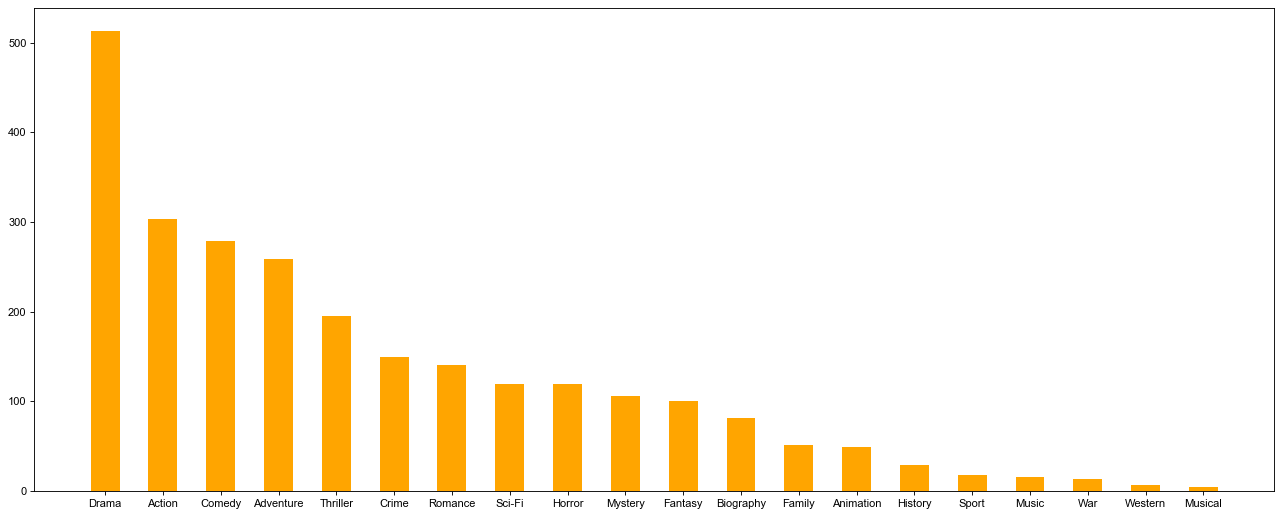

In [61]:
# 每个分类电影的和
new_zeros = zeros_df.sum(axis=0)

# 排序 画图
#genre_count=new_zeros
genre_count = new_zeros.sort_values(ascending=False)
x_ = genre_count.index
y_ = genre_count.values
plt.figure(figsize=(20,8),dpi=80)
plt.bar(range(len(x_)),y_,width=0.5,color="orange")
plt.xticks(range(len(x_)),x_)
plt.show()

## 年度分析

In [11]:
df_year=df.groupby('Year')['Revenue (Millions)'].sum()

In [12]:
plt.figure(figsize=[18,12],dpi=80)

NameError: name 'plt' is not defined

In [13]:
x=[y for y in df_year.index]
_x=[ "{}年".format(y) for y in df_year.index]

plt.plot(df_year)

plt.xticks(x,_x,rotation=90)

NameError: name 'plt' is not defined

np.array(df_year.index)

In [14]:
t1 = np.linspace(min_, max_, num=21)
t1

NameError: name 'min_' is not defined

In [ ]:
max_

**画条状图**

In [ ]:
plt.bar(df_year.index,df_year.values)

## 在DataFrame中使用时间序列

In [ ]:

df = pd.DataFrame(np.random.uniform(10,50,(100,1)),index=pd.date_range("20201001",periods=100))
df

In [ ]:
df.resample("10D").mean()

In [ ]:
df.resample("M").count()

In [ ]:
np.random.uniform(10,50,(100,1))

In [ ]:
df.resample('D')

###### 对比条形图

In [91]:
#假设你知道了列表a中电影分别在2017-09-14(b_14), 2017-09-15(b_15), 2017-09-16(b_16)三天的票房,为了展示列表中电影本身的票房以及同其他电影的数据对比情况,应该如何更加直观的呈现该数据?

a = ["猩球崛起3：终极之战","敦刻尔克","蜘蛛侠：英雄归来","战狼2"]
b_16 = [15746,312,4497,319]
b_15 = [12357,156,2045,168]
b_14 = [2358,399,2358,362]


<BarContainer object of 4 artists>

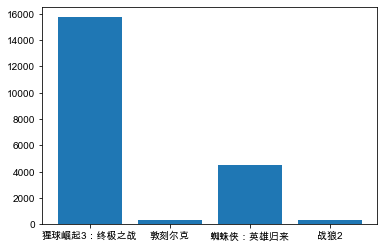

In [93]:
plt.bar(a,b_16)

<BarContainer object of 4 artists>

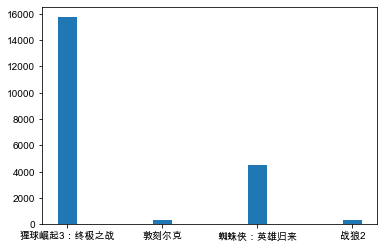

In [101]:
plt.bar(a,b_16,width=0.2,label='9月16日')

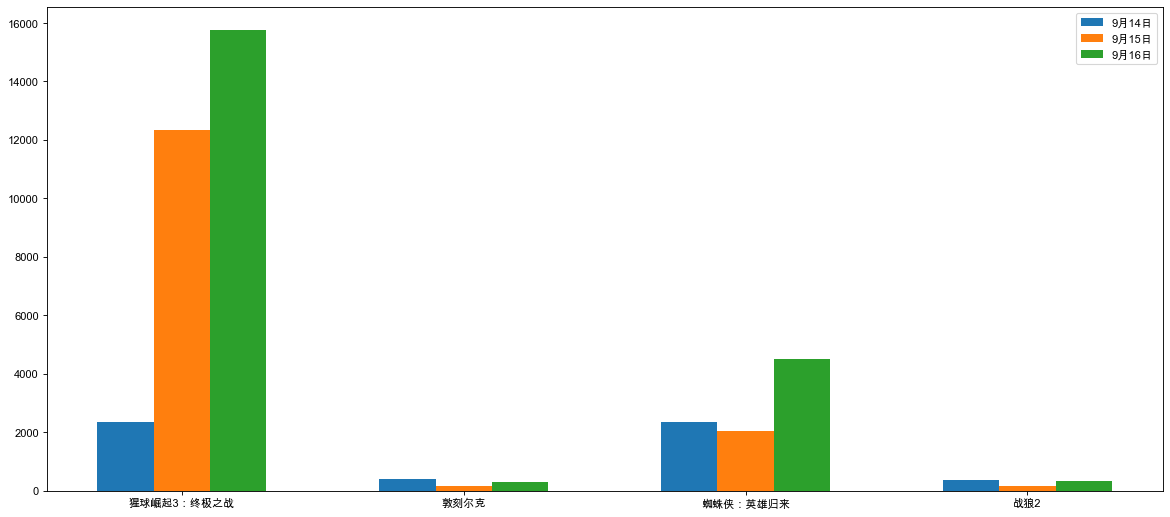

In [104]:
bar_width = 0.2

x_14 = list(range(len(a)))
x_15 =  [i+bar_width for i in x_14]
x_16 = [i+bar_width*2 for i in x_14]

#设置图形大小
plt.figure(figsize=(18,8),dpi=80)

plt.bar(range(len(a)),b_14,width=bar_width,label="9月14日")
plt.bar(x_15,b_15,width=bar_width,label="9月15日")
plt.bar(x_16,b_16,width=bar_width,label="9月16日")

#设置图例
plt.legend()

#设置x轴的刻度
plt.xticks(x_15,a)

plt.show()

###### 温度变化图

In [62]:
a = [11,17,16,11,12,11,12,6,6,7,8,9,12,15,14,17,18,21,16,17,20,14,15,15,15,19,21,22,22,22,23]
b = [26,26,28,19,21,17,16,19,18,20,20,19,22,23,17,20,21,20,22,15,11,15,5,13,17,10,11,13,12,13,6]


x_3=["3月{}号".format(str(i)) for i in range(1,32)]

x_10=["10月{}号".format(str(i)) for i in range(1,32)]

x=x_3+x_10

plt.figure(figsize=[12,6],dpi=80)
plt.scatter(x_3,a,label="3月份")
plt.scatter(x_10,b,label="10月份")
plt.xticks(range(0,62,2),x[::2],rotation=90)
#添加图例
plt.legend(loc="upper left")

#添加描述信息
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("时间温度变化情况")
plt.show()